# ANALYZING THE GROWTH OF INDIAN STARTUPS

In [13]:
import pandas as pd
df = pd.read_csv("startup.csv")
df.columns=["SNo","Date","StartupName", "IndustryVertical", "SubVertical", "City", "InvestorsName", "InvestmentType", "AmountInUSD","Remarks"]
df.head()

,SNo,Date,StartupName,IndustryVertical,SubVertical,City,InvestorsName,InvestmentType,AmountInUSD,Remarks
0,1,09-01-2020,BYJU’S,E-Tech,E-learning,Bengaluru,Tiger Global Management,Private Equity Round,"20,00,00,000",NaN
1,2,13-01-2020,Shuttl,Transportation,App based shuttle service,Gurgaon,Susquehanna Growth Equity,Series C,"80,48,394",NaN
2,3,09-01-2020,Mamaearth,E-commerce,Retailer of baby and toddler products,Bengaluru,Sequoia Capital India,Series B,"1,83,58,860",NaN
3,4,02-01-2020,https://www.wealthbucket.in/,FinTech,Online Investment,New Delhi,Vinod Khatumal,Pre-series A,"30,00,000",NaN
4,5,02-01-2020,Fashor,Fashion and Apparel,Embroiled Clothes For Women,Mumbai,Sprout Venture Partners,Seed Round,"18,00,000",NaN


In [14]:
df.shape

(3044, 10)

In [15]:
df.isna().sum()

SNo                    0
Date                   0
StartupName            0
IndustryVertical     171
SubVertical          936
City                 180
InvestorsName         24
InvestmentType         4
AmountInUSD          960
Remarks             2625
dtype: int64

# Altering the column data and treating null values

Many of the column datum are entered with some of typograpical mistakes ,so if we use the same datum that will not give proper required results. So correcting them  is necessary to get perfect output.

In [16]:
import re
import warnings
warnings.filterwarnings("ignore")

df['IndustryVertical'] = df['IndustryVertical'].fillna('Notdefined')
df.IndustryVertical= df.IndustryVertical.str.lower()
df['SubVertical'] = df['SubVertical'].fillna('Notdefined')
df.SubVertical= df.SubVertical.str.lower()
df['City'] = df['City'].fillna('Notdefined')
df.City= df.City.str.lower()
df['InvestorsName'] = df['InvestorsName'].fillna('Undisclosed')
df.InvestorsName= df.InvestorsName.str.lower()
df['InvestmentType'] = df['InvestmentType'].fillna('Undisclosed')
df.InvestmentType= df.InvestmentType.str.lower()
df['AmountInUSD']=df['AmountInUSD'].fillna('0')

for i in range(0,3044):
    df.Date[i]=re.sub("[^0-9]", "",df.Date[i])
    df.Date[i]=df.Date[i][4:8]+'-'+df.Date[i][2:4]+'-'+df.Date[i][0:2]
    df.Date[i]=df.Date[i].replace(' ','')
    
    df.IndustryVertical[i]=re.sub("[^a-zA-Z]+","",df.IndustryVertical[i])
    
    df.SubVertical[i]=re.sub("[^a-zA-Z]+","",df.SubVertical[i])
    
    df.City[i]=re.sub("[^a-zA-Z]+","",df.City[i])    
    df.City[i]=df.City[i].replace('xcxa','').replace('bengaluru','bangalore').replace('gurugram','gurgaon')
    
    df.InvestorsName[i]=re.sub("[^a-zA-Z]+","",df.InvestorsName[i])
    df.InvestorsName[i]=df.InvestorsName[i].replace('undisclosedinvestors','undisclosed').replace('undisclosedinvestor','undisclosed').replace('undisclosedhnis','undisclosed')
    
    df.InvestmentType[i]=re.sub("[^a-zA-Z]+","",df.InvestmentType[i])
    
    df.AmountInUSD[i]=re.sub("[^0-9]", "",df.AmountInUSD[i])
    

# Dropping the unwanted column

In [17]:
df=df.drop(['Remarks'],axis=1)
df.head()

,SNo,Date,StartupName,IndustryVertical,SubVertical,City,InvestorsName,InvestmentType,AmountInUSD
0,1,2020-01-09,BYJU’S,etech,elearning,bangalore,tigerglobalmanagement,privateequityround,200000000
1,2,2020-01-13,Shuttl,transportation,appbasedshuttleservice,gurgaon,susquehannagrowthequity,seriesc,8048394
2,3,2020-01-09,Mamaearth,ecommerce,retailerofbabyandtoddlerproducts,bangalore,sequoiacapitalindia,seriesb,18358860
3,4,2020-01-02,https://www.wealthbucket.in/,fintech,onlineinvestment,newdelhi,vinodkhatumal,preseriesa,3000000
4,5,2020-01-02,Fashor,fashionandapparel,embroiledclothesforwomen,mumbai,sproutventurepartners,seedround,1800000


# No of startups started with respect to each month

Text(0.5, 0.98, 'Startups in every month')

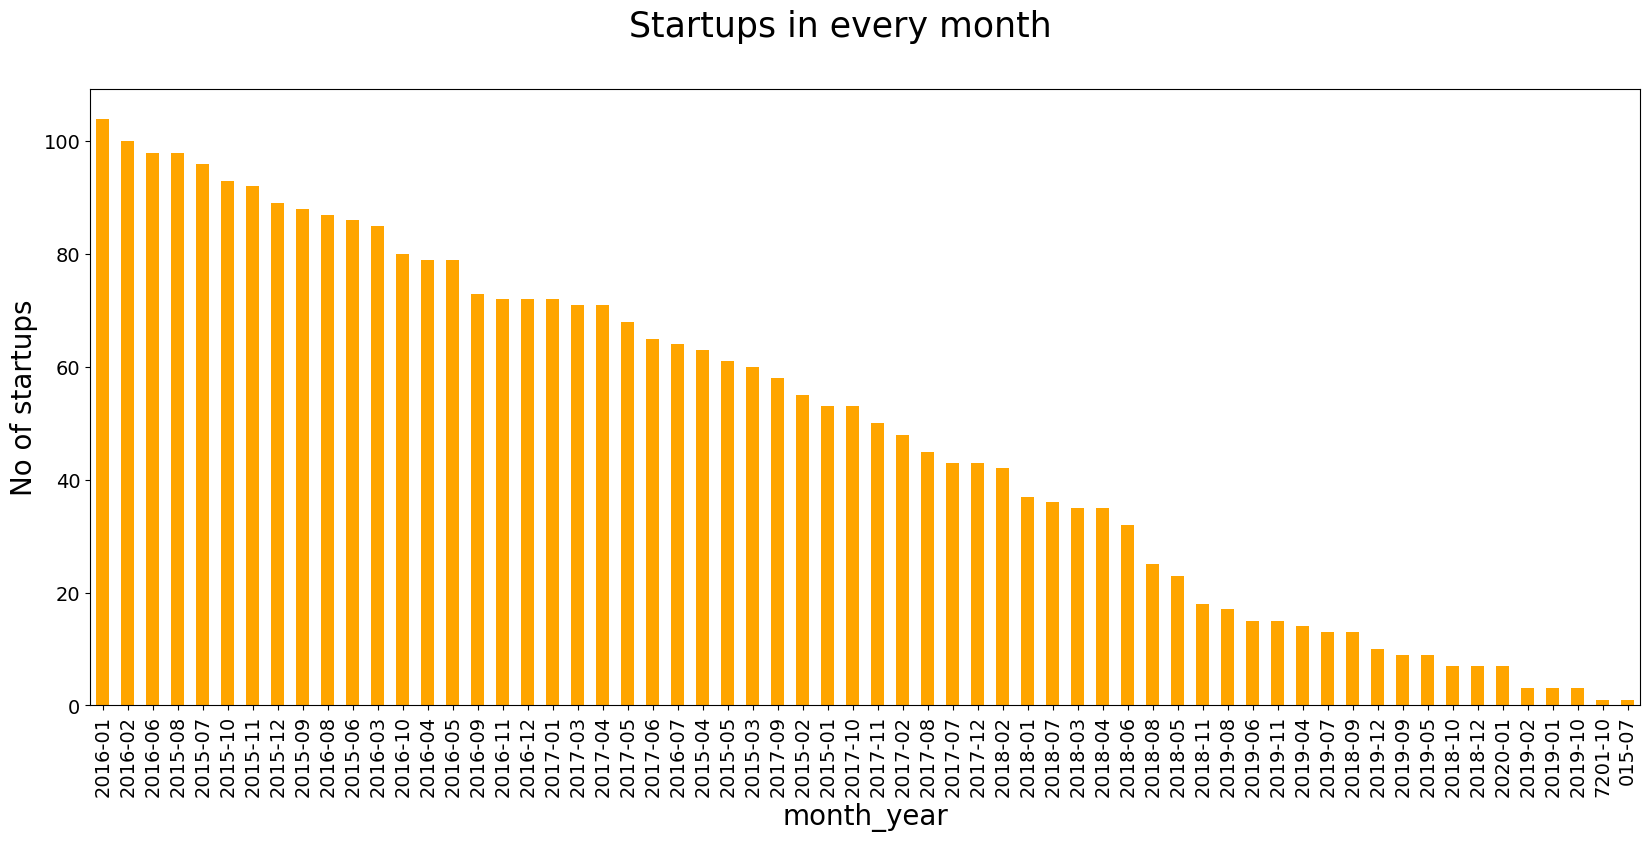

In [18]:
import matplotlib.pyplot as plt
k=0
for j in df.Date:
    df.Date[k]=j[:-3]
    k+=1
    
df.Date.value_counts().plot.bar(figsize=(20,8),fontsize= 14,color='orange')
plt.xlabel('month_year',fontsize=20)
plt.ylabel('No of startups',fontsize=20)
plt.suptitle('Startups in every month',fontsize=25)


From the above chart during the first two months of 2016 more number of startups have been started. Number of startups started increasing from the period of last few months of 2015 till second month of 2016. Its clear that during 2019 and 2020 startups were really less.

# Most preferred IndustryVertical for startup

Text(0.5, 0.98, 'IndustryVertical on startup')

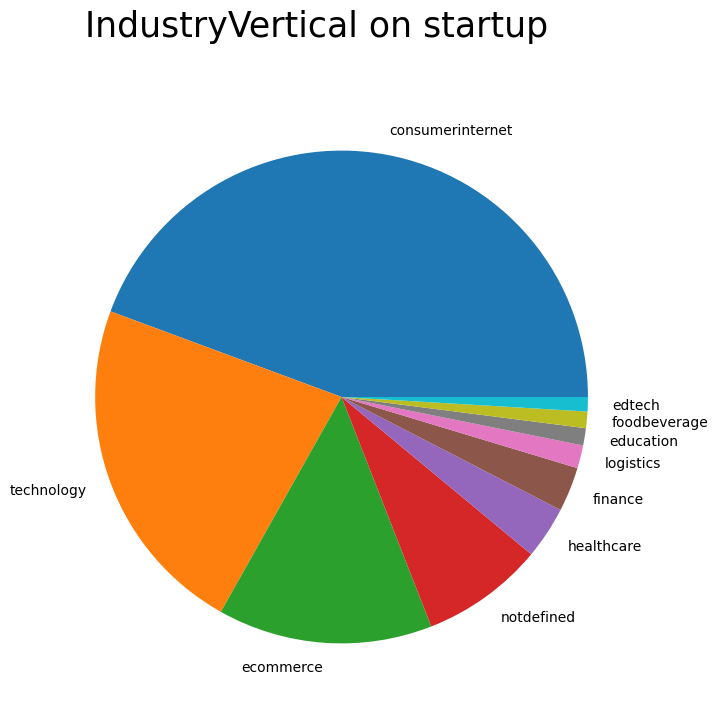

In [19]:
df.IndustryVertical.value_counts()[:10].plot.pie(figsize=(20,8))
plt.ylabel('')
plt.suptitle('IndustryVertical on startup',fontsize=25)

The most preferred industry vertical for a startup is consumerinternet. Technology is also one of the most perferred industry vertical for a startup,and then follows ecommerce and healthcare

# Most preferred SubVertical for startup

Text(0.5, 0.98, 'SubVertical on startup')

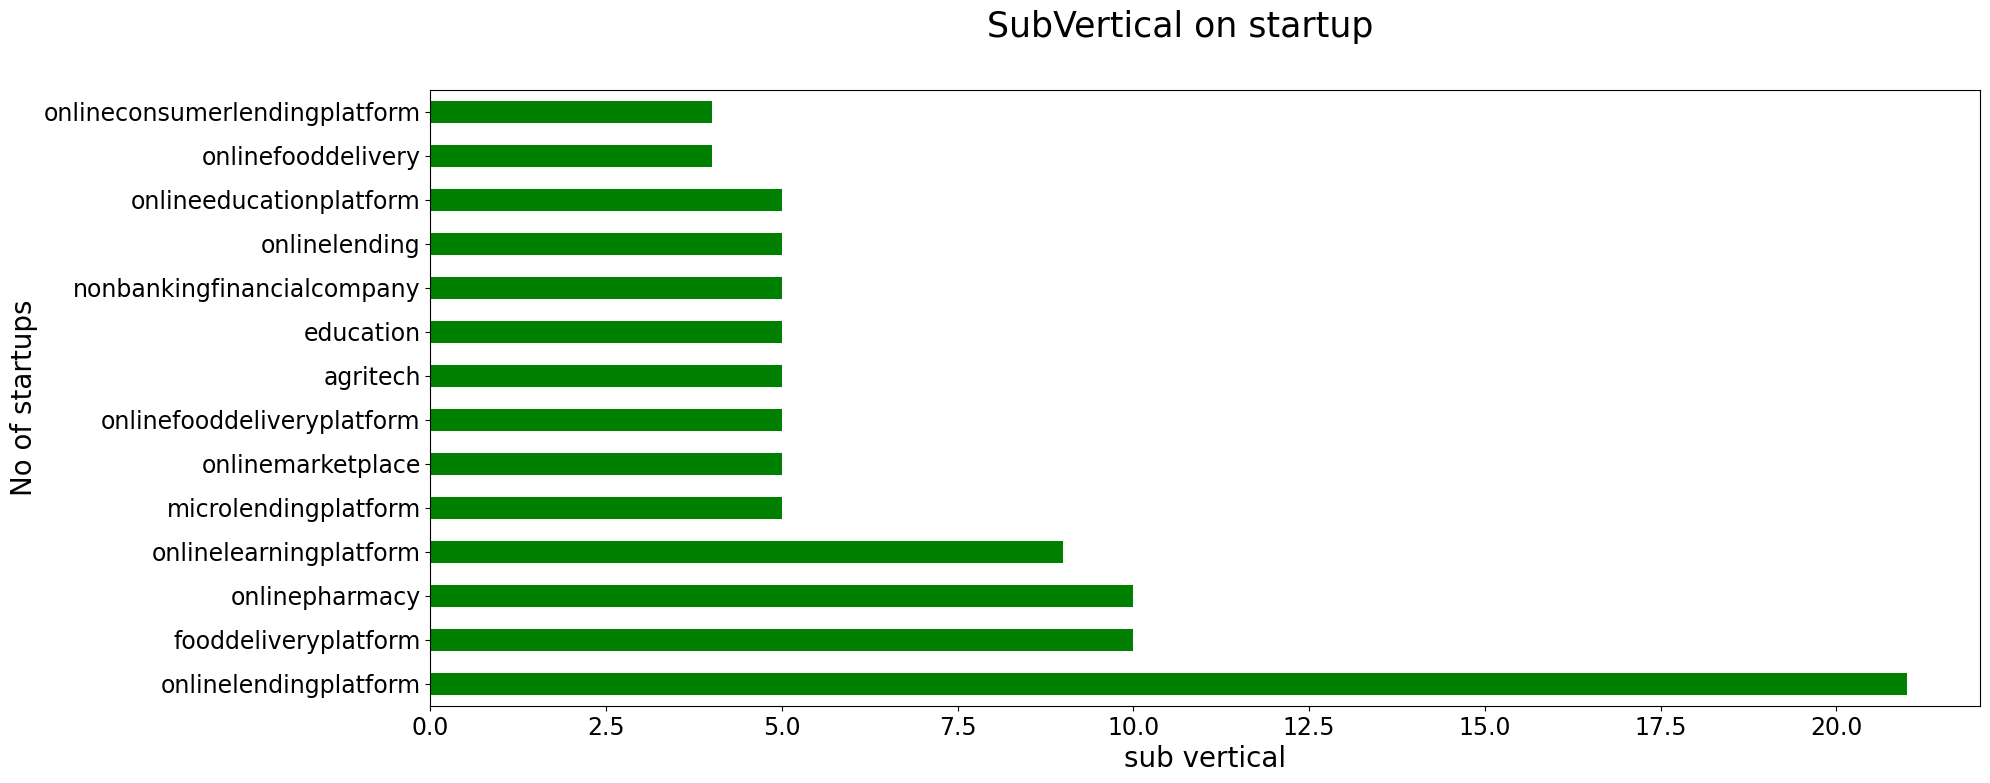

In [20]:
df.SubVertical.value_counts()[1:15].plot.barh(figsize=(20,8),fontsize= 17,color='green')
plt.xlabel('sub vertical',fontsize=20)
plt.ylabel('No of startups',fontsize=20)
plt.suptitle('SubVertical on startup',fontsize=25)


Most of startups didnt mention  subvertical. Onlineleadingplatform is the most preferred subvertical for startup

# Most preferred city for startup

Text(0.5, 0.98, 'Preferred City for startup')

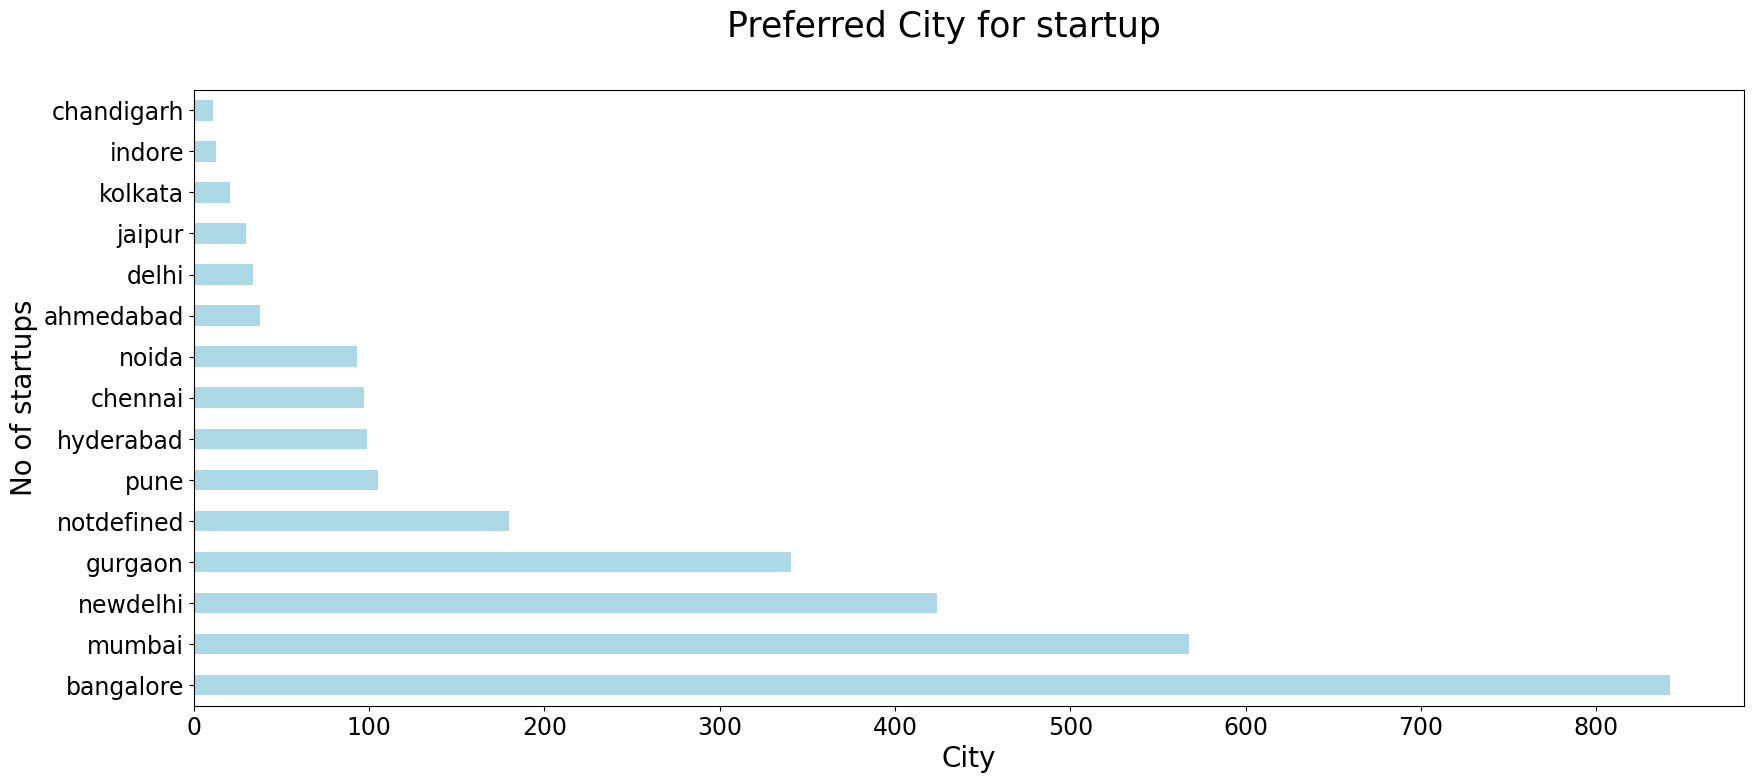

In [21]:
df.City.value_counts()[:15].plot.barh(figsize=(20,8),fontsize= 17,color='lightblue')
plt.xlabel('City',fontsize=20)
plt.ylabel('No of startups',fontsize=20)
plt.suptitle('Preferred City for startup',fontsize=25)


The above chart clearly depicts that Bangalore is the city where most of the startup have been started. Mumbai and newdelhi are the next preferred cities for startup.

# Investors invested in startup

Text(0.5, 0.98, 'Investors in startup')

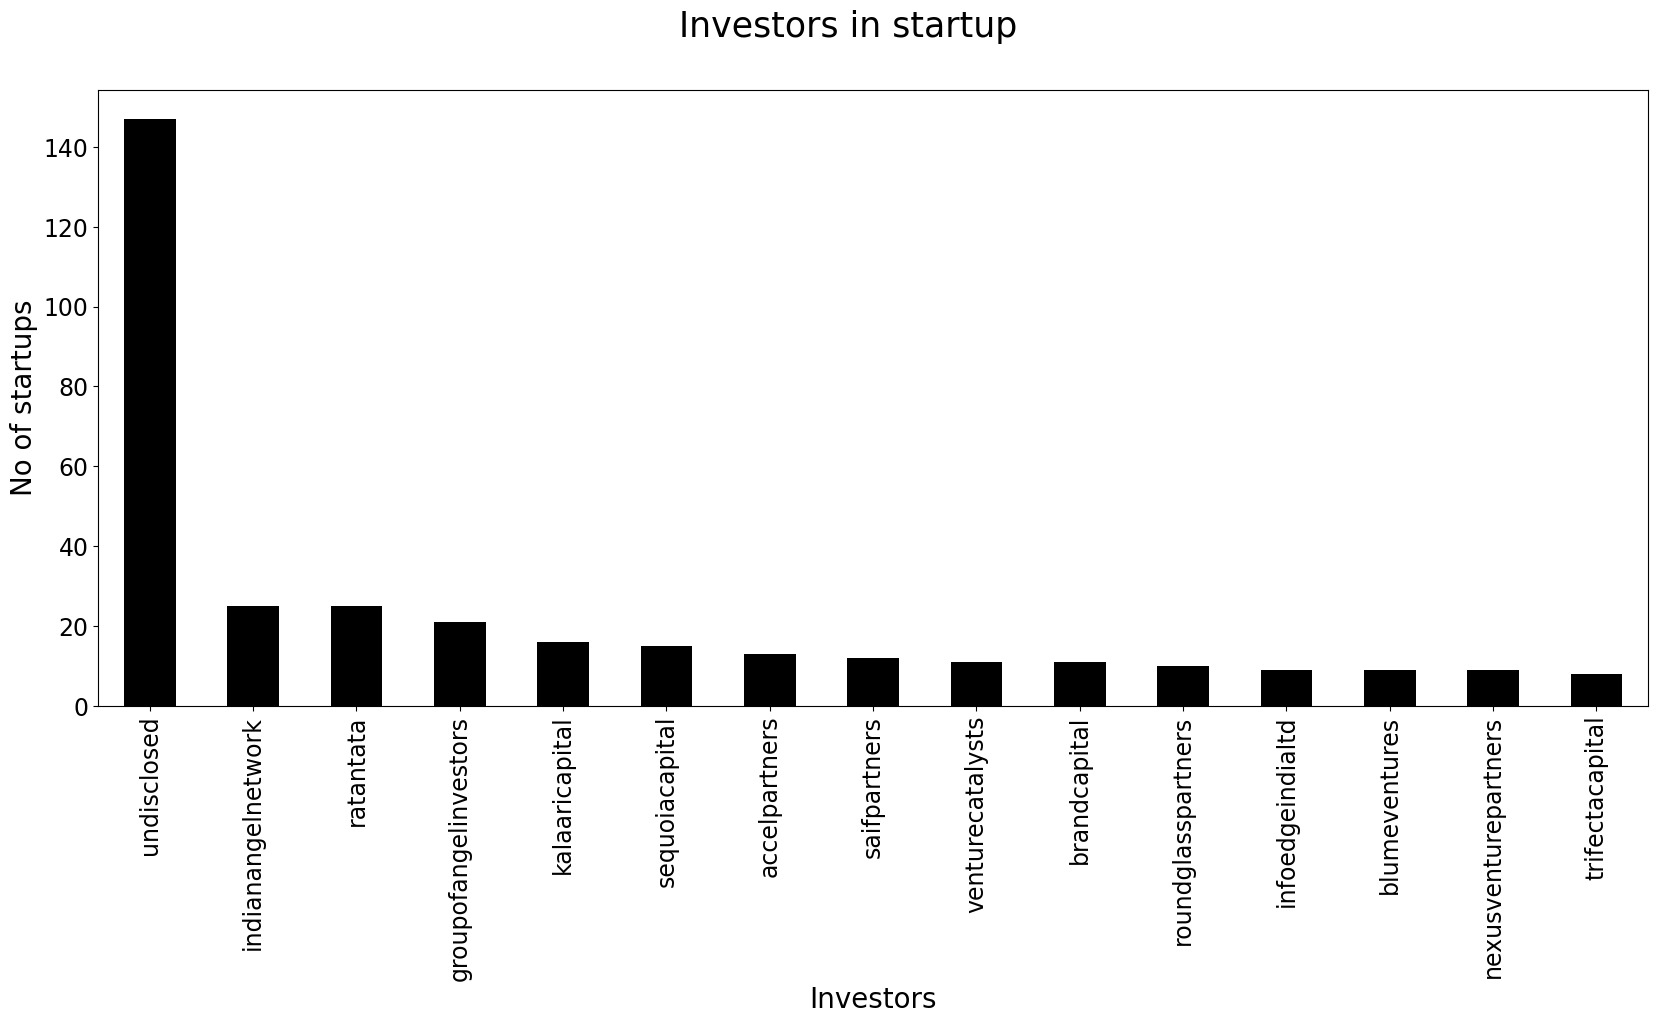

In [22]:
df.InvestorsName.value_counts()[:15].plot.bar(figsize=(20,8),fontsize= 17,color='black')
plt.xlabel('Investors',fontsize=20)
plt.ylabel('No of startups',fontsize=20)
plt.suptitle('Investors in startup',fontsize=25)


Most of startups didnot specific the name of the investors. INDIAN ANGEL NETWORK, RATANTATA, GROUP OF ANGEL INVESTORS are the investors invested in more startups

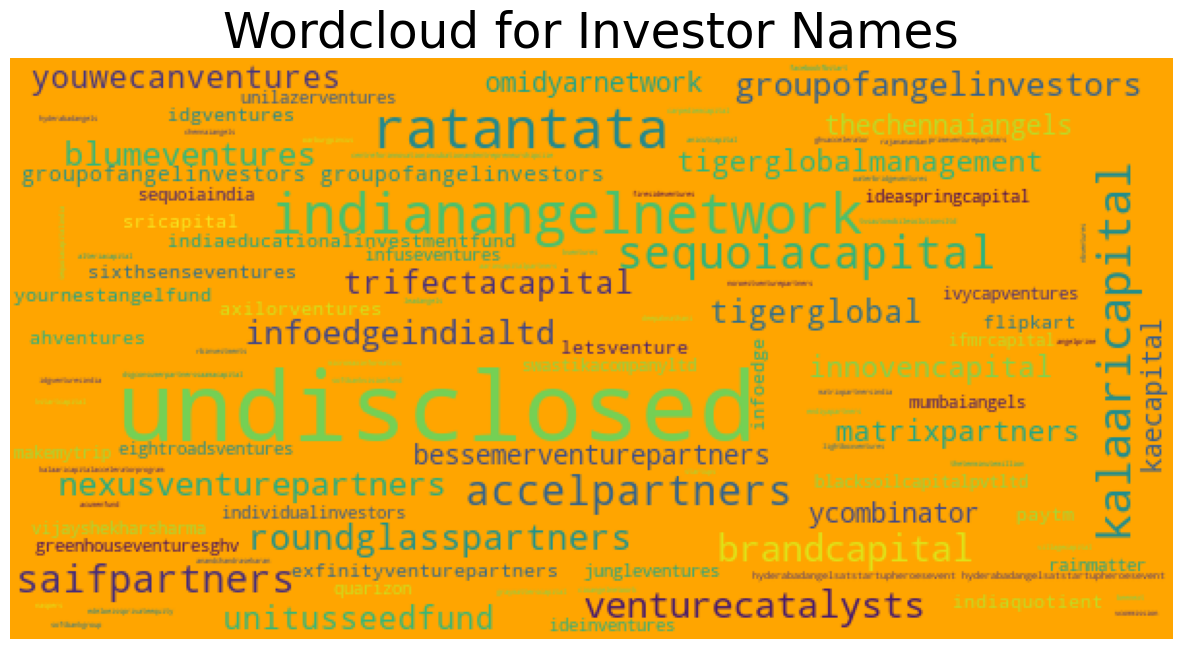

In [23]:
from wordcloud import WordCloud
wordcloud = WordCloud(max_font_size=50, width=600, height=300, background_color = 'orange').generate(' '.join(df.InvestorsName))
plt.figure(figsize=(15,8))
plt.imshow(wordcloud)
plt.title("Wordcloud for Investor Names", fontsize=35)
plt.axis("off")
plt.show()


# Most preferred InvestmentType

Text(0.5, 0.98, 'InvestmentType in startup')

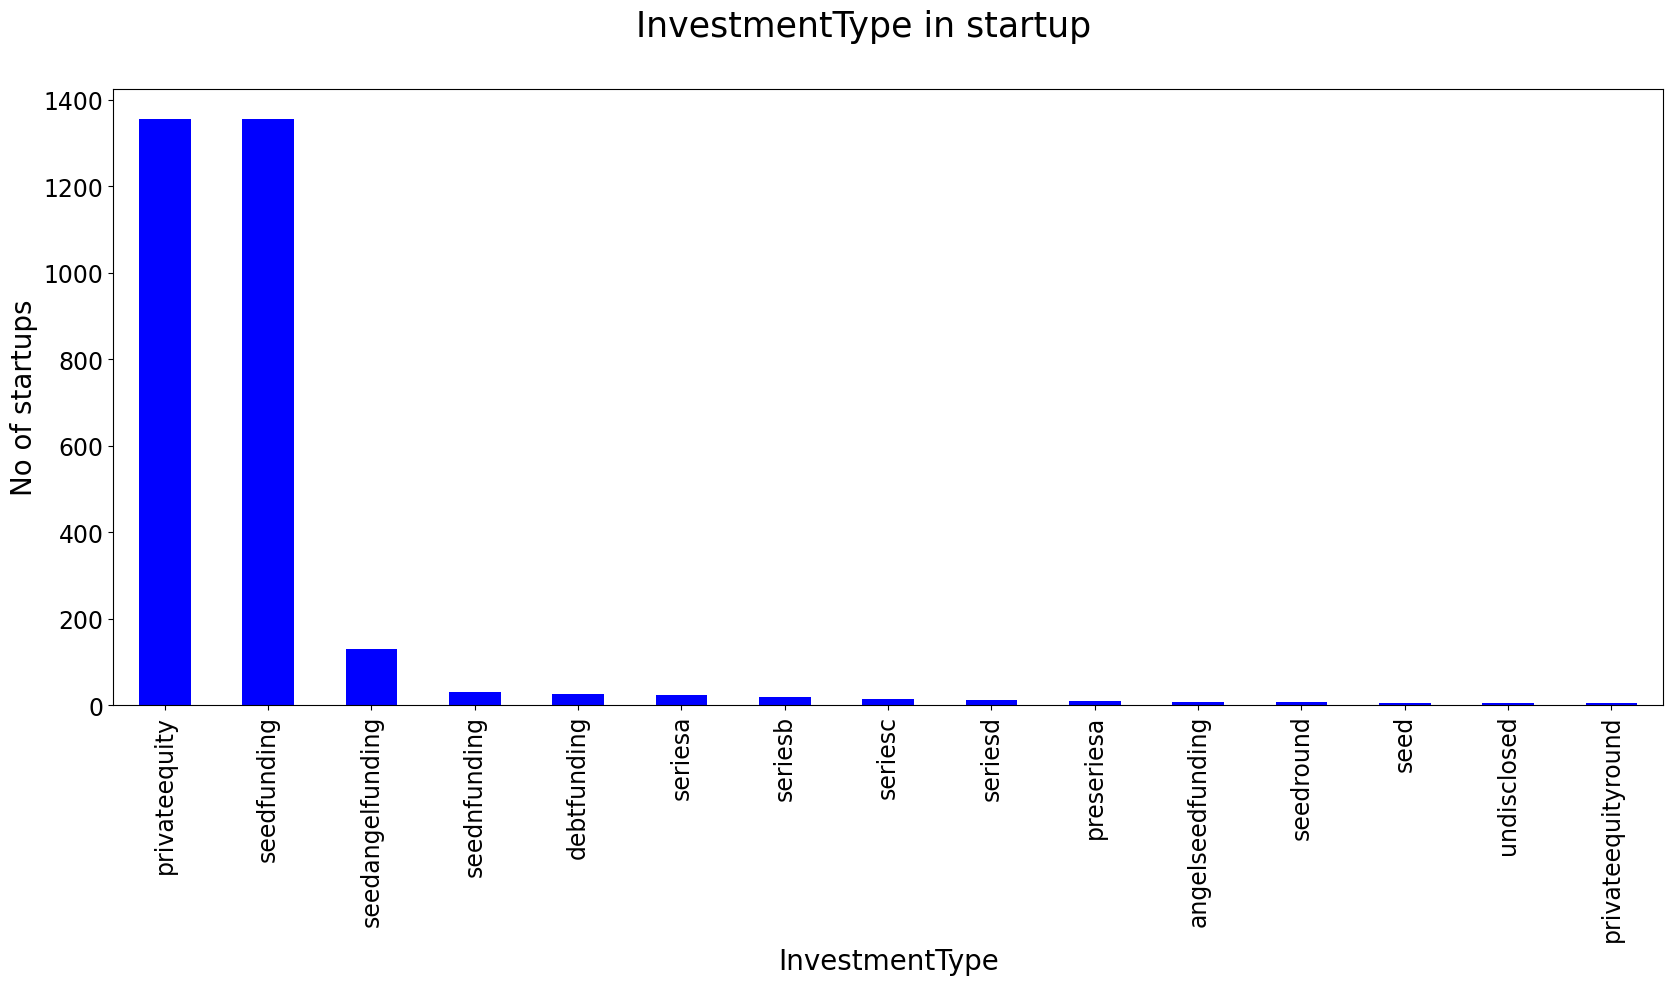

In [24]:
df.InvestmentType.value_counts()[:15].plot.bar(figsize=(20,8),fontsize= 17,color='blue')
plt.xlabel('InvestmentType',fontsize=20)
plt.ylabel('No of startups',fontsize=20)
plt.suptitle('InvestmentType in startup',fontsize=25)


Private equity and seed funding are the most preferred type of investment for startup. Other types of investment type is really less when compared to seed funding and private equity

# Distribution of amount in startup

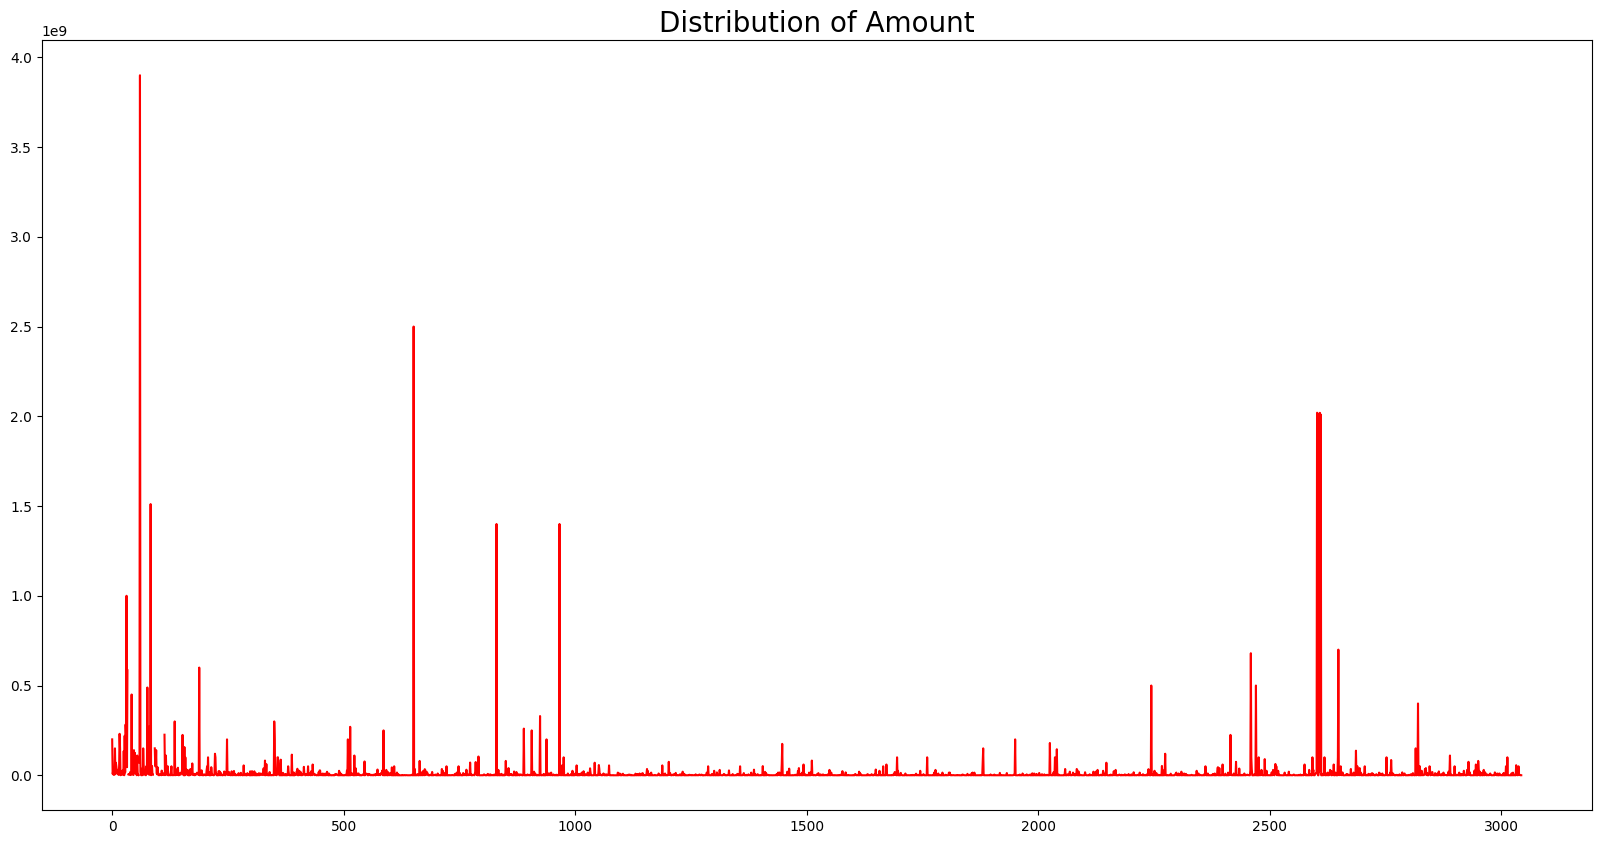

In [25]:
df['AmountInUSD']=pd.to_numeric(df['AmountInUSD'])
df['AmountInUSD'].plot(kind = 'line', color = 'red',figsize=(20,10))
plt.title('Distribution of Amount', fontsize = 20)
plt.show()